In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [18]:
train = data_train.loc[:,["Open"]].values
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [22]:
x_train=[]
y_train=[]
timesteps=5

for i in range (timesteps,1258):
    x_train.append(train_scaled[i-timesteps:i])
    y_train.append(train_scaled[i])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [27]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN, Dropout

regressor= Sequential()

regressor.add(SimpleRNN(units=100, activation='relu', return_sequences='True', input_shape=(x_train.shape[1],1)))
regressor.add(SimpleRNN(units=100, activation='relu', return_sequences='True'))
regressor.add(SimpleRNN(units=100, activation='relu', return_sequences='True'))
regressor.add(SimpleRNN(units=100))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mse')
regressor.fit(x_train,y_train, epochs=10, batch_size=1)

Epoch 1/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0062
Epoch 2/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0020
Epoch 3/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 9.9249e-04
Epoch 4/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 9.1373e-04
Epoch 5/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0010
Epoch 6/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 6.6441e-04
Epoch 7/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 6.2514e-04
Epoch 8/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0014
Epoch 9/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 7.1557e-04
Epoch 10/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.1464e-04


In [28]:
data_test= pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [30]:
real_stock_price = data_test.loc[:,["Open"]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [34]:
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis=0)
inputs= data_total[len(data_total)-len(data_test)-timesteps:].values.reshape(-1,1)
print(inputs)
inputs = scaler.transform(inputs)


[[790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


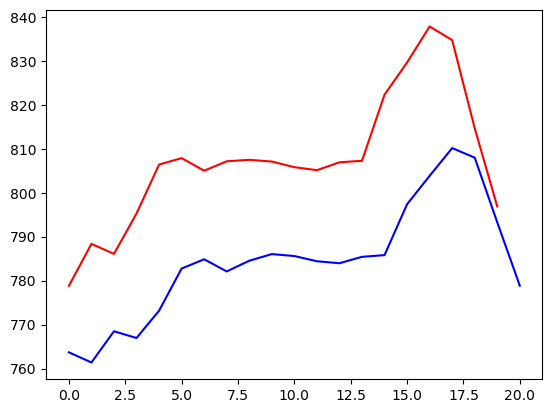

In [36]:
x_test = []
for i in range(timesteps,70):
    if len(inputs[i-timesteps:i])== timesteps:
        x_test.append(inputs[i-timesteps:i])
        
x_test=np.array(x_test)
predict_stock_price = regressor.predict(x_test)
predict_stock_price = scaler.inverse_transform(predict_stock_price)

plt.plot(real_stock_price, color= 'red', label = 'Real Stock Price')
plt.plot(predict_stock_price, color='blue', label="predict Stock price")
plt.show()